## 參考資料
* [pandas.sort_values方法详解](https://zhuanlan.zhihu.com/p/35013079)
* [Python資料視覺化筆記（二）—使用Seaborn繪圖](https://medium.com/@yanweiliu/python-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96%E7%AD%86%E8%A8%98-%E4%BA%8C-%E4%BD%BF%E7%94%A8seaborn%E7%B9%AA%E5%9C%96-3adb03407a9)
* [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)
* [Matplotlib-02散佈圖](https://medium.com/%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96/matplotlib-02-%E6%95%A3%E4%BD%88%E5%9C%96-942ece7aba60)
* [什麼是Seaborn庫？如何繪製出六種常用可視化圖形？](https://kknews.cc/zh-tw/code/oabjpx6.html)
* [seaborn.pairplot ](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
* [DataFrame - drop() function](https://www.w3resource.com/pandas/dataframe/dataframe-drop.php)

In [1]:
##用于可视化图表
import matplotlib.pyplot as plt
##用于做科学计算
import numpy as np
##用于做数据分析
import pandas as pd
##用于加载数据或生成数据等
from sklearn import datasets
##加载线性模型
from sklearn import linear_model
###用于交叉验证以及训练集和测试集的划分
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
###这个模块中含有评分函数，性能度量，距离计算等
from sklearn import metrics
import seaborn as sns

In [2]:
boston = datasets.load_boston()
print(boston.data.shape)
print(boston["feature_names"])
boston.keys()  

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
boston_X = boston.data   ##获得数据集中的输入
boston_y = boston.target ##获得数据集中的输出
boston_data = pd.DataFrame(boston_X)
boston_data.columns =boston['feature_names']
boston_data["PRICE"]=boston_y
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [5]:
boston_data.dropna(
    axis=0,     # 0: 对列作; 1: 对行操作
    how='any',   # 'any': 只要存在 NaN 就 drop 掉; 'all': 必须全部是 NaN 才 drop 
    inplace=True)
boston_data = boston_data.reset_index(drop=True)
boston_data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [6]:
boston_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
#相關係數0.3以下為低相關，0.3~0.7為中等相關，0.7以上為高度相關
boston_data.corr().sort_values(by=['PRICE'],ascending=False)#.sort_values(by=['PRICE'],ascending=False)用來排序　ascending為true為由小到大

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
PRICE,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.000000
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
B,-0.385064,0.175520,-0.356977,0.048788,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


'LSTAT', 'PRICE'相關係數：-0.737663，高度相關
'RM', 'PRICE'相關係數：0.695360，中度相關
'PTRATIO', 'PRICE'相關係數：-0.507787，中度相關
'INDUS', 'PRICE'相關係數：-0.4837257，中度相關
'DIS', 'PRICE'相關係數：0.249929，低相關
'CHAS', 'PRICE'相關係數：0.175260，低相關


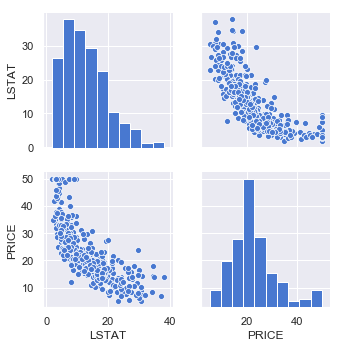

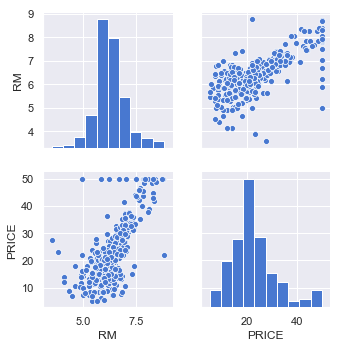

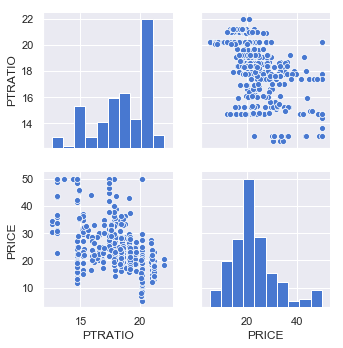

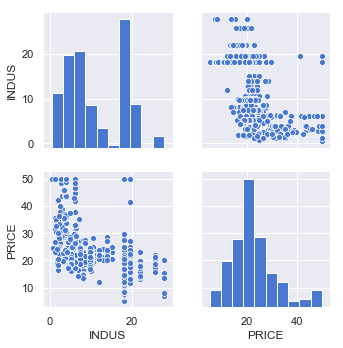

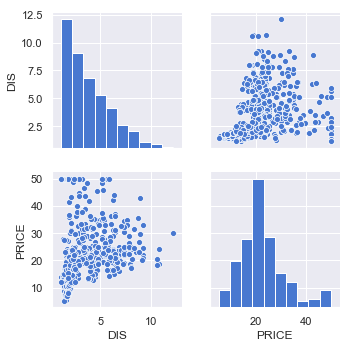

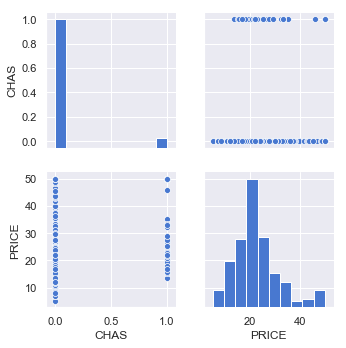

In [38]:
sns.set(palette="muted", color_codes=True) 
print("'LSTAT', 'PRICE'相關係數：-0.737663，高度相關")
sns.pairplot(boston_data, vars=['LSTAT', 'PRICE']) 
print("'RM', 'PRICE'相關係數：0.695360，中度相關")
sns.pairplot(boston_data, vars=['RM', 'PRICE']) 
print("'PTRATIO', 'PRICE'相關係數：-0.507787，中度相關")
sns.pairplot(boston_data, vars=['PTRATIO', 'PRICE']) 
print("'INDUS', 'PRICE'相關係數：-0.4837257，中度相關")
sns.pairplot(boston_data, vars=['INDUS', 'PRICE']) 
print("'DIS', 'PRICE'相關係數：0.249929，低相關")
sns.pairplot(boston_data, vars=['DIS', 'PRICE'])
print("'CHAS', 'PRICE'相關係數：0.175260，低相關")
sns.pairplot(boston_data, vars=['CHAS', 'PRICE'])

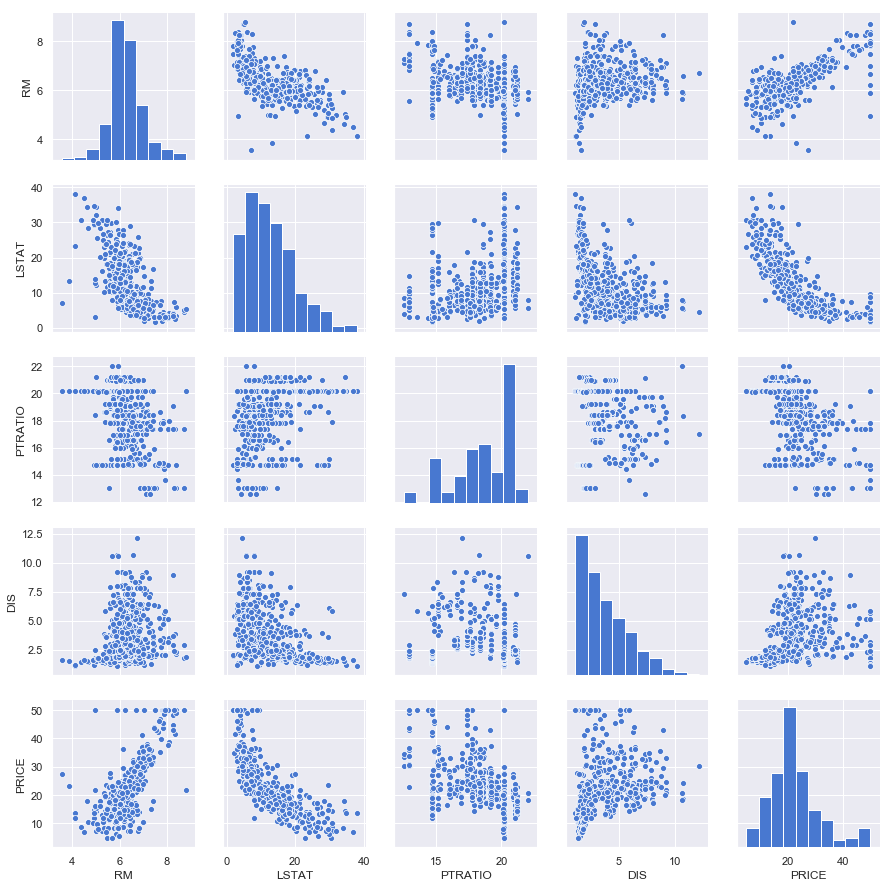

In [41]:
sns.pairplot(boston_data, vars=['RM',"LSTAT","PTRATIO", 'DIS','PRICE']) 


In [49]:
noprice=boston_data.drop(['PRICE'], axis=1)
noprice.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [48]:
noprice.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993
